<a href="https://colab.research.google.com/github/PaulToronto/DataCamp-Track---Machine-Learning-Scientist-in-Python/blob/main/3_1_Unsupervised_Learing_in_Python_Clustering_for_Dataset_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3-1 Unsupervised Learing in Python - Clustering for Dataset Exploration

## Imports

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
import seaborn as sns

## Data

### Iris

In [2]:
data_url = 'https://drive.google.com/uc?id=1Rqb4thhyLP1OZVvMamDdJ0EI1UQgIR44'
iris = pd.read_csv(data_url)
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Seeds

In [3]:
data_url = 'https://drive.google.com/uc?id=1-sfcYNfZ3bC2K5AesWHcDiPiqTo1S_ie'
seeds = pd.read_csv(data_url, header=None)
seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       210 non-null    float64
 1   1       210 non-null    float64
 2   2       210 non-null    float64
 3   3       210 non-null    float64
 4   4       210 non-null    float64
 5   5       210 non-null    float64
 6   6       210 non-null    float64
 7   7       210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


### Wine

In [4]:
data_url = 'https://drive.google.com/uc?id=1mslRAnj9qdJfIqJpiVt8lSC3ygnfpzF-'
wine = pd.read_csv(data_url)
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class_label           178 non-null    int64  
 1   class_name            178 non-null    object 
 2   alcohol               178 non-null    float64
 3   malic_acid            178 non-null    float64
 4   ash                   178 non-null    float64
 5   alcalinity_of_ash     178 non-null    float64
 6   magnesium             178 non-null    int64  
 7   total_phenols         178 non-null    float64
 8   flavanoids            178 non-null    float64
 9   nonflavanoid_phenols  178 non-null    float64
 10  proanthocyanins       178 non-null    float64
 11  color_intensity       178 non-null    float64
 12  hue                   178 non-null    float64
 13  od280                 178 non-null    float64
 14  proline               178 non-null    int64  
dtypes: float64(11), int64(3

### Fish

In [5]:
data_url = 'https://drive.google.com/uc?id=1uXnAe5FMcaRUkkiphEksjtuFqLRstfMN'
fish = pd.read_csv(data_url, header=None)
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       85 non-null     object 
 1   1       85 non-null     float64
 2   2       85 non-null     float64
 3   3       85 non-null     float64
 4   4       85 non-null     float64
 5   5       85 non-null     float64
 6   6       85 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.8+ KB


### Stock Movement

In [6]:
data_url = 'https://drive.google.com/uc?id=1tcU2IA8NDoWO-0LHbaOSYayB3_Kw7Wlc'
stock_movement = pd.read_csv(data_url)
stock_movement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Columns: 964 entries, Unnamed: 0 to 2013-10-29
dtypes: float64(963), object(1)
memory usage: 452.0+ KB


In [7]:
stock_movement = stock_movement.rename(columns={stock_movement.columns[0]: 'Company'})
stock_movement.head()

,Company,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [8]:
stock_movement.shape

(60, 964)

## Unsupervised Learning

- Unsupervised learning finds patterns in data
- Example: **clustering** customers by their purchases
- Compressing the data using purchase patterns - **dimension reduction**

### Supervised vs unsupervised learning

- Supervised learning finds patterns for a prediction task
- Example: classify tumors as benign or cancerous with labelled data
- Unsupervised learning finds patterns in data
    - But without labels and without a specific prediction task in mind

### Iris dataset

- Measurements of many iris plants
- Three species of iris

In [9]:
print(iris['variety'].unique())

['Setosa' 'Versicolor' 'Virginica']


- 4 diffrent measurements

In [10]:
print(iris.columns[:-1].values)

['sepal.length' 'sepal.width' 'petal.length' 'petal.width']


### Iris data is 4-dimensional

- Iris sampels are points in 4 dimensional space
- Dimension: number of features
- Too many dimensions to visualize
    - Unsupervised laerning can give us insights

### k-means clustering

- Finds clusters of samples
- Number of clusters must be specified
- Implemented in `sklearn`

In [11]:
# from sklearn.cluster import KMeans

X = iris.drop('variety', axis=1)
y = iris['variety']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [12]:
model = KMeans(n_clusters=3)
model.fit(X_train)

KMeans(n_clusters=3)

In [13]:
train_labels = model.predict(X_train)
train_labels

array([1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 0, 2, 0, 2, 0,
       2, 1, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 0, 1, 2, 2, 1, 2, 2,
       2, 2, 0, 2, 1, 2, 0, 1, 1, 2, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0, 2,
       1, 1, 2, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0,
       2, 2, 2, 1, 2, 2, 1, 2, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0,
       2, 2, 2, 2, 1, 2, 2, 1, 2, 0], dtype=int32)

In [14]:
train_set_df = pd.DataFrame({'labels': train_labels, 'variety': y_train.values})
train_set_df.groupby(['labels', 'variety']).size()

labels  variety   
0       Versicolor     3
        Virginica     26
1       Setosa        40
2       Versicolor    38
        Virginica     13
dtype: int64

### Cluster labels for new samples

- New samples can be assigned to existing clusters
- k-means remembers the mean of each cluster - the **centroids**
- Findthe nearest centrold to each new sample

```python
# centrolds
model.cluster_centres_
```

In [15]:
test_labels = model.predict(X_test)
test_labels

array([2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 2, 2, 0, 1, 2,
       1, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [16]:
test_set_df = pd.DataFrame({'labels': test_labels, 'variety': y_test.values})
test_set_df.groupby(['labels', 'variety']).size()

labels  variety   
0       Virginica     10
1       Setosa        10
2       Versicolor     9
        Virginica      1
dtype: int64

### Calculating the centroid manually

- $C_k$: the centroid
- $N_k$: the number of points in the cluster
- $x_1, x_2, ..., x_{N_k}$: the points in the cluster

$$
C_k = \frac{1}{N_k}\sum_{i=1}^{N_k}x_i
$$

In [17]:
cluster_0 = X_train[train_labels == 0].values
cluster_1 = X_train[train_labels == 1].values
cluster_2 = X_train[train_labels == 2].values

C_0 = np.sum(cluster_0, axis=0) / len(cluster_0)
C_1 = np.sum(cluster_1, axis=0) / len(cluster_1)
C_2 = np.sum(cluster_2, axis=0) / len(cluster_2)

np.array([C_0, C_1, C_2])

array([[6.85517241, 3.10344828, 5.70689655, 2.02068966],
       [4.99      , 3.4525    , 1.45      , 0.245     ],
       [5.85686275, 2.73137255, 4.38627451, 1.44313725]])

In [18]:
# matches the manual calculation!
model.cluster_centers_

array([[6.85517241, 3.10344828, 5.70689655, 2.02068966],
       [4.99      , 3.4525    , 1.45      , 0.245     ],
       [5.85686275, 2.73137255, 4.38627451, 1.44313725]])

### Manual Cluster Prediction

- $d_k$: the Euclidean distance betweenm $x$ and the $k^{th}$ cluster centroid $C_k$
- $x_i$: the $i^{th}$ feature of the data point $x$
- $C_{k,i}$: the $i^{th}$ feature of the centroid $C_k$
- $n$: the number of features in your dataset

$$
d_k = \sqrt{\sum_{i=1}^{n}\left(x_i - C_{k,i}\right)^2}
$$

- We need the cluster that minimizes this distance

In [19]:
new_point = X_test.iloc[0].values
new_point, test_labels[0]

(array([6.1, 2.8, 4.7, 1.2]), 2)

In [20]:
# manual calculation of the `new_point` cluster
distances = np.sqrt(np.sum((new_point - model.cluster_centers_)**2, axis=1))
predicted_cluster = np.argmin(distances)
predicted_cluster

2

In [21]:
new_point - model.cluster_centers_

array([[-0.75517241, -0.30344828, -1.00689655, -0.82068966],
       [ 1.11      , -0.6525    ,  3.25      ,  0.955     ],
       [ 0.24313725,  0.06862745,  0.31372549, -0.24313725]])

In [22]:
# alternately
distances = np.linalg.norm(new_point - model.cluster_centers_, axis=1)
predicted_cluster = np.argmin(distances)
predicted_cluster

2

In [23]:
# try it on X_test
X_test.values[:, np.newaxis, :]

array([[[6.1, 2.8, 4.7, 1.2]],

       [[5.7, 3.8, 1.7, 0.3]],

       [[7.7, 2.6, 6.9, 2.3]],

       [[6. , 2.9, 4.5, 1.5]],

       [[6.8, 2.8, 4.8, 1.4]],

       [[5.4, 3.4, 1.5, 0.4]],

       [[5.6, 2.9, 3.6, 1.3]],

       [[6.9, 3.1, 5.1, 2.3]],

       [[6.2, 2.2, 4.5, 1.5]],

       [[5.8, 2.7, 3.9, 1.2]],

       [[6.5, 3.2, 5.1, 2. ]],

       [[4.8, 3. , 1.4, 0.1]],

       [[5.5, 3.5, 1.3, 0.2]],

       [[4.9, 3.1, 1.5, 0.1]],

       [[5.1, 3.8, 1.5, 0.3]],

       [[6.3, 3.3, 4.7, 1.6]],

       [[6.5, 3. , 5.8, 2.2]],

       [[5.6, 2.5, 3.9, 1.1]],

       [[5.7, 2.8, 4.5, 1.3]],

       [[6.4, 2.8, 5.6, 2.2]],

       [[4.7, 3.2, 1.6, 0.2]],

       [[6.1, 3. , 4.9, 1.8]],

       [[5. , 3.4, 1.6, 0.4]],

       [[6.4, 2.8, 5.6, 2.1]],

       [[7.9, 3.8, 6.4, 2. ]],

       [[6.7, 3. , 5.2, 2.3]],

       [[6.7, 2.5, 5.8, 1.8]],

       [[6.8, 3.2, 5.9, 2.3]],

       [[4.8, 3. , 1.4, 0.3]],

       [[4.8, 3.1, 1.6, 0.2]]])

In [24]:
distances = np.sqrt(np.sum((X_test.values[:, np.newaxis, :] - model.cluster_centers_)**2, axis=2))
predicted_clusters = np.argmin(distances, axis=1)
predicted_clusters

array([2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 2, 2, 0, 1, 2,
       1, 0, 0, 0, 0, 0, 1, 1])

In [25]:
test_labels == predicted_clusters

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

### Scatter plot of the clusters

In [26]:
test_labels

array([2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 2, 2, 0, 1, 2,
       1, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [27]:
X_train

,sepal.length,sepal.width,petal.length,petal.width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


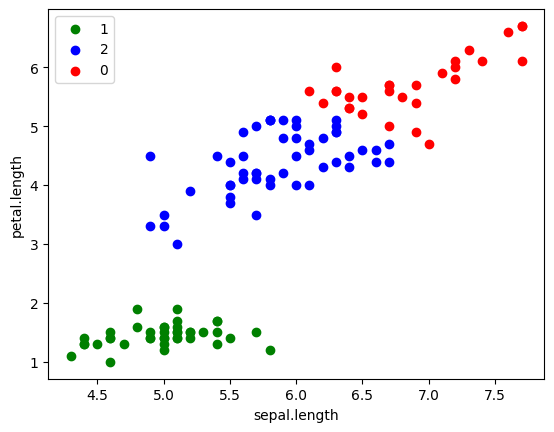

In [28]:
fig, ax = plt.subplots()

colors = {0: 'red', 1: 'green', 2: 'blue'}
legend_labels = set()

for i, row in enumerate(X_train.iterrows()):
    label = train_labels[i] if train_labels[i] not in legend_labels else None
    ax.scatter(row[1]['sepal.length'],
                row[1]['petal.length'],
                color=colors[train_labels[i]],
                label=label)

    legend_labels.add(train_labels[i]) # mark label as used

ax.set_xlabel('sepal.length')
ax.set_ylabel('petal.length')
ax.legend()

plt.show()

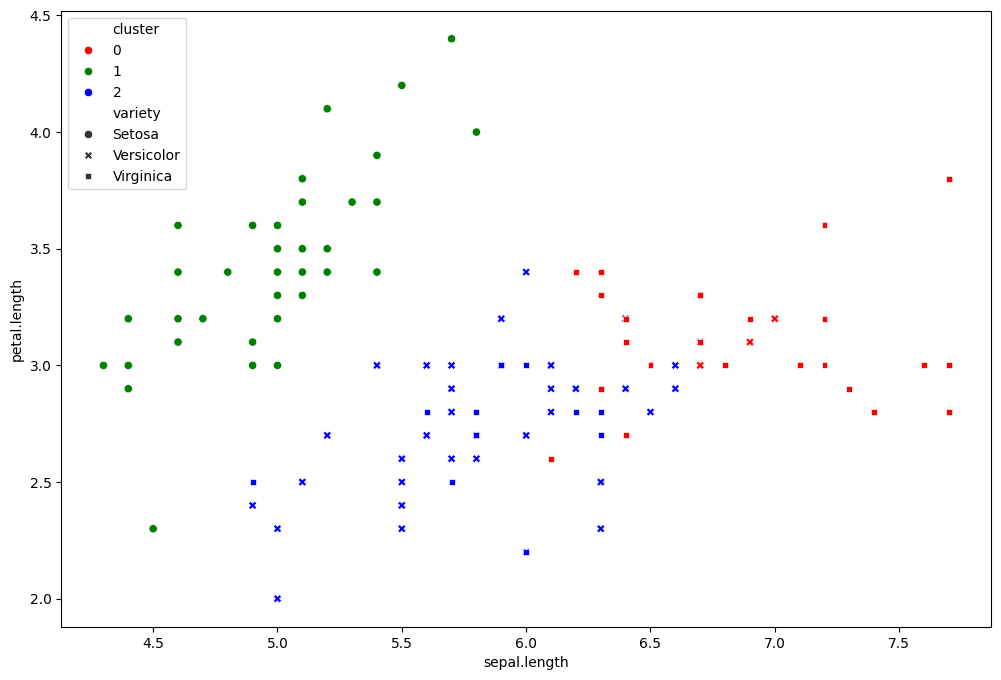

In [29]:
# alternately with seaborn

X_train_plot_df = X_train.copy()
X_train_plot_df['cluster'] = train_labels
X_train_plot_df['variety'] = y_train

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=X_train_plot_df,
    x='sepal.length',
    y='sepal.width',
    hue='cluster',
    style='variety',
    palette = {0: 'red', 1: 'green', 2: 'blue'},
)

plt.xlabel('sepal.length')
plt.ylabel('petal.length')

plt.show()

### How many clusters?

In [30]:
points = np.array([[ 0.06544649, -0.76866376],
       [-1.52901547, -0.42953079],
       [ 1.70993371,  0.69885253],
       [ 1.16779145,  1.01262638],
       [-1.80110088, -0.31861296],
       [-1.63567888, -0.02859535],
       [ 1.21990375,  0.74643463],
       [-0.26175155, -0.62492939],
       [-1.61925804, -0.47983949],
       [-1.84329582, -0.16694431],
       [ 1.35999602,  0.94995827],
       [ 0.42291856, -0.7349534 ],
       [-1.68576139,  0.10686728],
       [ 0.90629995,  1.09105162],
       [-1.56478322, -0.84675394],
       [-0.0257849 , -1.18672539],
       [ 0.83027324,  1.14504612],
       [ 1.22450432,  1.35066759],
       [-0.15394596, -0.71704301],
       [ 0.86358809,  1.06824613],
       [-1.43386366, -0.2381297 ],
       [ 0.03844769, -0.74635022],
       [-1.58567922,  0.08499354],
       [ 0.6359888 , -0.58477698],
       [ 0.24417242, -0.53172465],
       [-2.19680359,  0.49473677],
       [ 1.0323503 , -0.55688   ],
       [-0.28858067, -0.39972528],
       [ 0.20597008, -0.80171536],
       [-1.2107308 , -0.34924109],
       [ 1.33423684,  0.7721489 ],
       [ 1.19480152,  1.04788556],
       [ 0.9917477 ,  0.89202008],
       [-1.8356219 , -0.04839732],
       [ 0.08415721, -0.71564326],
       [-1.48970175, -0.19299604],
       [ 0.38782418, -0.82060119],
       [-0.01448044, -0.9779841 ],
       [-2.0521341 , -0.02129125],
       [ 0.10331194, -0.82162781],
       [-0.44189315, -0.65710974],
       [ 1.10390926,  1.02481182],
       [-1.59227759, -0.17374038],
       [-1.47344152, -0.02202853],
       [-1.35514704,  0.22971067],
       [ 0.0412337 , -1.23776622],
       [ 0.4761517 , -1.13672124],
       [ 1.04335676,  0.82345905],
       [-0.07961882, -0.85677394],
       [ 0.87065059,  1.08052841],
       [ 1.40267313,  1.07525119],
       [ 0.80111157,  1.28342825],
       [-0.16527516, -1.23583804],
       [-0.33779221, -0.59194323],
       [ 0.80610749, -0.73752159],
       [-1.43590032, -0.56384446],
       [ 0.54868895, -0.95143829],
       [ 0.46803131, -0.74973907],
       [-1.5137129 , -0.83914323],
       [ 0.9138436 ,  1.51126532],
       [-1.97233903, -0.41155375],
       [ 0.5213406 , -0.88654894],
       [ 0.62759494, -1.18590477],
       [ 0.94163014,  1.35399335],
       [ 0.56994768,  1.07036606],
       [-1.87663382,  0.14745773],
       [ 0.90612186,  0.91084011],
       [-1.37481454,  0.28428395],
       [-1.80564029, -0.96710574],
       [ 0.34307757, -0.79999275],
       [ 0.70380566,  1.00025804],
       [-1.68489862, -0.30564595],
       [ 1.31473221,  0.98614978],
       [ 0.26151216, -0.26069251],
       [ 0.9193121 ,  0.82371485],
       [-1.21795929, -0.20219674],
       [-0.17722723, -1.02665245],
       [ 0.64824862, -0.66822881],
       [ 0.41206786, -0.28783784],
       [ 1.01568202,  1.13481667],
       [ 0.67900254, -0.91489502],
       [-1.05182747, -0.01062376],
       [ 0.61306599,  1.78210384],
       [-1.50219748, -0.52308922],
       [-1.72717293, -0.46173916],
       [-1.60995631, -0.1821007 ],
       [-1.09111021, -0.0781398 ],
       [-0.01046978, -0.80913034],
       [ 0.32782303, -0.80734754],
       [ 1.22038503,  1.1959793 ],
       [-1.33328681, -0.30001937],
       [ 0.87959517,  1.11566491],
       [-1.14829098, -0.30400762],
       [-0.58019755, -1.19996018],
       [-0.01161159, -0.78468854],
       [ 0.17359724, -0.63398145],
       [ 1.32738556,  0.67759969],
       [-1.93467327,  0.30572472],
       [-1.57761893, -0.27726365],
       [ 0.47639   ,  1.21422648],
       [-1.65237509, -0.6803981 ],
       [-0.12609976, -1.04327457],
       [-1.89607082, -0.70085502],
       [ 0.57466899,  0.74878369],
       [-0.16660312, -0.83110295],
       [ 0.8013355 ,  1.22244435],
       [ 1.18455426,  1.4346467 ],
       [ 1.08864428,  0.64667112],
       [-1.61158505,  0.22805725],
       [-1.57512205, -0.09612576],
       [ 0.0721357 , -0.69640328],
       [-1.40054298,  0.16390598],
       [ 1.09607713,  1.16804691],
       [-2.54346204, -0.23089822],
       [-1.34544875,  0.25151126],
       [-1.35478629, -0.19103317],
       [ 0.18368113, -1.15827725],
       [-1.31368677, -0.376357  ],
       [ 0.09990129,  1.22500491],
       [ 1.17225574,  1.30835143],
       [ 0.0865397 , -0.79714371],
       [-0.21053923, -1.13421511],
       [ 0.26496024, -0.94760742],
       [-0.2557591 , -1.06266022],
       [-0.26039757, -0.74774225],
       [-1.91787359,  0.16434571],
       [ 0.93021139,  0.49436331],
       [ 0.44770467, -0.72877918],
       [-1.63802869, -0.58925528],
       [-1.95712763, -0.10125137],
       [ 0.9270337 ,  0.88251423],
       [ 1.25660093,  0.60828073],
       [-1.72818632,  0.08416887],
       [ 0.3499788 , -0.30490298],
       [-1.51696082, -0.50913109],
       [ 0.18763605, -0.55424924],
       [ 0.89609809,  0.83551508],
       [-1.54968857, -0.17114782],
       [ 1.2157457 ,  1.23317728],
       [ 0.20307745, -1.03784906],
       [ 0.84589086,  1.03615273],
       [ 0.53237919,  1.47362884],
       [-0.05319044, -1.36150553],
       [ 1.38819743,  1.11729915],
       [ 1.00696304,  1.0367721 ],
       [ 0.56681869, -1.09637176],
       [ 0.86888296,  1.05248874],
       [-1.16286609, -0.55875245],
       [ 0.27717768, -0.83844015],
       [ 0.16563267, -0.80306607],
       [ 0.38263303, -0.42683241],
       [ 1.14519807,  0.89659026],
       [ 0.81455857,  0.67533667],
       [-1.8603152 , -0.09537561],
       [ 0.965641  ,  0.90295579],
       [-1.49897451, -0.33254044],
       [-0.1335489 , -0.80727582],
       [ 0.12541527, -1.13354906],
       [ 1.06062436,  1.28816358],
       [-1.49154578, -0.2024641 ],
       [ 1.16189032,  1.28819877],
       [ 0.54282033,  0.75203524],
       [ 0.89221065,  0.99211624],
       [-1.49932011, -0.32430667],
       [ 0.3166647 , -1.34482915],
       [ 0.13972469, -1.22097448],
       [-1.5499724 , -0.10782584],
       [ 1.23846858,  1.37668804],
       [ 1.25558954,  0.72026098],
       [ 0.25558689, -1.28529763],
       [ 0.45168933, -0.55952093],
       [ 1.06202057,  1.03404604],
       [ 0.67451908, -0.54970299],
       [ 0.22759676, -1.02729468],
       [-1.45835281, -0.04951074],
       [ 0.23273501, -0.70849262],
       [ 1.59679589,  1.11395076],
       [ 0.80476105,  0.544627  ],
       [ 1.15492521,  1.04352191],
       [ 0.59632776, -1.19142897],
       [ 0.02839068, -0.43829366],
       [ 1.13451584,  0.5632633 ],
       [ 0.21576204, -1.04445753],
       [ 1.41048987,  1.02830719],
       [ 1.12289302,  0.58029441],
       [ 0.25200688, -0.82588436],
       [-1.28566081, -0.07390909],
       [ 1.52849815,  1.11822469],
       [-0.23907858, -0.70541972],
       [-0.25792784, -0.81825035],
       [ 0.59367818, -0.45239915],
       [ 0.07931909, -0.29233213],
       [-1.27256815,  0.11630577],
       [ 0.66930129,  1.00731481],
       [ 0.34791546, -1.20822877],
       [-2.11283993, -0.66897935],
       [-1.6293824 , -0.32718222],
       [-1.53819139, -0.01501972],
       [-0.11988545, -0.6036339 ],
       [-1.54418956, -0.30389844],
       [ 0.30026614, -0.77723173],
       [ 0.00935449, -0.53888192],
       [-1.33424393, -0.11560431],
       [ 0.47504489,  0.78421384],
       [ 0.59313264,  1.232239  ],
       [ 0.41370369, -1.35205857],
       [ 0.55840948,  0.78831053],
       [ 0.49855018, -0.789949  ],
       [ 0.35675809, -0.81038693],
       [-1.86197825, -0.59071305],
       [-1.61977671, -0.16076687],
       [ 0.80779295, -0.73311294],
       [ 1.62745775,  0.62787163],
       [-1.56993593, -0.08467567],
       [ 1.02558561,  0.89383302],
       [ 0.24293461, -0.6088253 ],
       [ 1.23130242,  1.00262186],
       [-1.9651013 , -0.15886289],
       [ 0.42795032, -0.70384432],
       [-1.58306818, -0.19431923],
       [-1.57195922,  0.01413469],
       [-0.98145373,  0.06132285],
       [-1.48637844, -0.5746531 ],
       [ 0.98745828,  0.69188053],
       [ 1.28619721,  1.28128821],
       [ 0.85850596,  0.95541481],
       [ 0.19028286, -0.82112942],
       [ 0.26561046, -0.04255239],
       [-1.61897897,  0.00862372],
       [ 0.24070183, -0.52664209],
       [ 1.15220993,  0.43916694],
       [-1.21967812, -0.2580313 ],
       [ 0.33412533, -0.86117761],
       [ 0.17131003, -0.75638965],
       [-1.19828397, -0.73744665],
       [-0.12245932, -0.45648879],
       [ 1.51200698,  0.88825741],
       [ 1.10338866,  0.92347479],
       [ 1.30972095,  0.59066989],
       [ 0.19964876,  1.14855889],
       [ 0.81460515,  0.84538972],
       [-1.6422739 , -0.42296206],
       [ 0.01224351, -0.21247816],
       [ 0.33709102, -0.74618065],
       [ 0.47301054,  0.72712075],
       [ 0.34706626,  1.23033757],
       [-0.00393279, -0.97209694],
       [-1.64303119,  0.05276337],
       [ 1.44649625,  1.14217033],
       [-1.93030087, -0.40026146],
       [-2.37296135, -0.72633645],
       [ 0.45860122, -1.06048953],
       [ 0.4896361 , -1.18928313],
       [-1.02335902, -0.17520578],
       [-1.32761107, -0.93963549],
       [-1.50987909, -0.09473658],
       [ 0.02723057, -0.79870549],
       [ 1.0169412 ,  1.26461701],
       [ 0.47733527, -0.9898471 ],
       [-1.27784224, -0.547416  ],
       [ 0.49898802, -0.6237259 ],
       [ 1.06004731,  0.86870008],
       [ 1.00207501,  1.38293512],
       [ 1.31161394,  0.62833956],
       [ 1.13428443,  1.18346542],
       [ 1.27671346,  0.96632878],
       [-0.63342885, -0.97768251],
       [ 0.12698779, -0.93142317],
       [-1.34510812, -0.23754226],
       [-0.53162278, -1.25153594],
       [ 0.21959934, -0.90269938],
       [-1.78997479, -0.12115748],
       [ 1.23197473, -0.07453764],
       [ 1.4163536 ,  1.21551752],
       [-1.90280976, -0.1638976 ],
       [-0.22440081, -0.75454248],
       [ 0.59559412,  0.92414553],
       [ 1.21930773,  1.08175284],
       [-1.99427535, -0.37587799],
       [-1.27818474, -0.52454551],
       [ 0.62352689, -1.01430108],
       [ 0.14024251, -0.428266  ],
       [-0.16145713, -1.16359731],
       [-1.74795865, -0.06033101],
       [-1.16659791,  0.0902393 ],
       [ 0.41110408, -0.8084249 ],
       [ 1.14757168,  0.77804528],
       [-1.65590748, -0.40105446],
       [-1.15306865,  0.00858699],
       [ 0.60892121,  0.68974833],
       [-0.08434138, -0.97615256],
       [ 0.19170053, -0.42331438],
       [ 0.29663162, -1.13357399],
       [-1.36893628, -0.25052124],
       [-0.08037807, -0.56784155],
       [ 0.35695011, -1.15064408],
       [ 0.02482179, -0.63594828],
       [-1.49075558, -0.2482507 ],
       [-1.408588  ,  0.25635431],
       [-1.98274626, -0.54584475]])

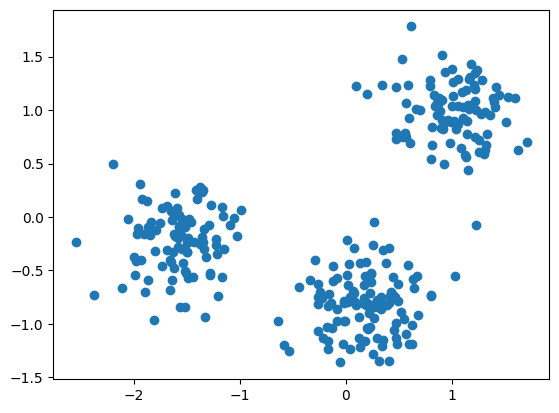

In [31]:
xs = points[:, 0]
ys = points[:, 1]

# looks like 3 clusters
plt.scatter(xs, ys)
plt.show()

### Clustering 2D points

In [32]:
new_points = np.array([[ 4.00233332e-01, -1.26544471e+00],
       [ 8.03230370e-01,  1.28260167e+00],
       [-1.39507552e+00,  5.57292921e-02],
       [-3.41192677e-01, -1.07661994e+00],
       [ 1.54781747e+00,  1.40250049e+00],
       [ 2.45032018e-01, -4.83442328e-01],
       [ 1.20706886e+00,  8.88752605e-01],
       [ 1.25132628e+00,  1.15555395e+00],
       [ 1.81004415e+00,  9.65530731e-01],
       [-1.66963401e+00, -3.08103509e-01],
       [-7.17482105e-02, -9.37939700e-01],
       [ 6.82631927e-01,  1.10258160e+00],
       [ 1.09039598e+00,  1.43899529e+00],
       [-1.67645414e+00, -5.04557049e-01],
       [-1.84447804e+00,  4.52539544e-02],
       [ 1.24234851e+00,  1.02088661e+00],
       [-1.86147041e+00,  6.38645811e-03],
       [-1.46044943e+00,  1.53252383e-01],
       [ 4.98981817e-01,  8.98006058e-01],
       [ 9.83962244e-01,  1.04369375e+00],
       [-1.83136742e+00, -1.63632835e-01],
       [ 1.30622617e+00,  1.07658717e+00],
       [ 3.53420328e-01, -7.51320218e-01],
       [ 1.13957970e+00,  1.54503860e+00],
       [ 2.93995694e-01, -1.26135005e+00],
       [-1.14558225e+00, -3.78709636e-02],
       [ 1.18716105e+00,  6.00240663e-01],
       [-2.23211946e+00,  2.30475094e-01],
       [-1.28320430e+00, -3.93314568e-01],
       [ 4.94296696e-01, -8.83972009e-01],
       [ 6.31834930e-02, -9.11952228e-01],
       [ 9.35759539e-01,  8.66820685e-01],
       [ 1.58014721e+00,  1.03788392e+00],
       [ 1.06304960e+00,  1.02706082e+00],
       [-1.39732536e+00, -5.05162249e-01],
       [-1.09935240e-01, -9.08113619e-01],
       [ 1.17346758e+00,  9.47501092e-01],
       [ 9.20084511e-01,  1.45767672e+00],
       [ 5.82658956e-01, -9.00086832e-01],
       [ 9.52772328e-01,  8.99042386e-01],
       [-1.37266956e+00, -3.17878215e-02],
       [ 2.12706760e-02, -7.07614194e-01],
       [ 3.27049052e-01, -5.55998107e-01],
       [-1.71590267e+00,  2.15222266e-01],
       [ 5.12516209e-01, -7.60128245e-01],
       [ 1.13023469e+00,  7.22451122e-01],
       [-1.43074310e+00, -3.42787511e-01],
       [-1.82724625e+00,  1.17657775e-01],
       [ 1.41801350e+00,  1.11455080e+00],
       [ 1.26897304e+00,  1.41925971e+00],
       [ 8.04076494e-01,  1.63988557e+00],
       [ 8.34567752e-01,  1.09956689e+00],
       [-1.24714732e+00, -2.23522320e-01],
       [-1.29422537e+00,  8.18770024e-02],
       [-2.27378316e-01, -4.13331387e-01],
       [ 2.18830387e-01, -4.68183120e-01],
       [-1.22593414e+00,  2.55599147e-01],
       [-1.31294033e+00, -4.28892070e-01],
       [-1.33532382e+00,  6.52053776e-01],
       [-3.01100233e-01, -1.25156451e+00],
       [ 2.02778356e-01, -9.05277445e-01],
       [ 1.01357784e+00,  1.12378981e+00],
       [ 8.18324394e-01,  8.60841257e-01],
       [ 1.26181556e+00,  1.46613744e+00],
       [ 4.64867724e-01, -7.97212459e-01],
       [ 3.60908898e-01,  8.44106720e-01],
       [-2.15098310e+00, -3.69583937e-01],
       [ 1.05005281e+00,  8.74181364e-01],
       [ 1.06580074e-01, -7.49268153e-01],
       [-1.73945723e+00,  2.52183577e-01],
       [-1.12017687e-01, -6.52469788e-01],
       [ 5.16618951e-01, -6.41267582e-01],
       [ 3.26621787e-01, -8.80608015e-01],
       [ 1.09017759e+00,  1.10952558e+00],
       [ 3.64459576e-01, -6.94215622e-01],
       [-1.90779318e+00,  1.87383674e-01],
       [-1.95601829e+00,  1.39959126e-01],
       [ 3.18541701e-01, -4.05271704e-01],
       [ 7.36512699e-01,  1.76416255e+00],
       [-1.44175162e+00, -5.72320429e-02],
       [ 3.21757168e-01, -5.34283821e-01],
       [-1.37317305e+00,  4.64484644e-02],
       [ 6.87225910e-02, -1.10522944e+00],
       [ 9.59314218e-01,  6.52316210e-01],
       [-1.62641919e+00, -5.62423280e-01],
       [ 1.06788305e+00,  7.29260482e-01],
       [-1.79643547e+00, -9.88307418e-01],
       [-9.88628377e-02, -6.81198092e-02],
       [-1.05135700e-01,  1.17022143e+00],
       [ 8.79964699e-01,  1.25340317e+00],
       [ 9.80753407e-01,  1.15486539e+00],
       [-8.33224966e-02, -9.24844368e-01],
       [ 8.48759673e-01,  1.09397425e+00],
       [ 1.32941649e+00,  1.13734563e+00],
       [ 3.23788068e-01, -7.49732451e-01],
       [-1.52610970e+00, -2.49016929e-01],
       [-1.48598116e+00, -2.68828608e-01],
       [-1.80479553e+00,  1.87052700e-01],
       [-2.01907347e+00, -4.49511651e-01],
       [ 2.87202402e-01, -6.55487415e-01],
       [ 8.22295102e-01,  1.38443234e+00],
       [-3.56997036e-02, -8.01825807e-01],
       [-1.66955440e+00, -1.38258505e-01],
       [-1.78226821e+00,  2.93353033e-01],
       [ 7.25837138e-01, -6.23374024e-01],
       [ 3.88432593e-01, -7.61283497e-01],
       [ 1.49002783e+00,  7.95678671e-01],
       [ 6.55423228e-04, -7.40580702e-01],
       [-1.34533116e+00, -4.75629937e-01],
       [-8.03845106e-01, -3.09943013e-01],
       [-2.49041295e-01, -1.00662418e+00],
       [-1.41095118e+00, -7.06744127e-02],
       [-1.75119594e+00, -3.00491336e-01],
       [-1.27942724e+00,  1.73774600e-01],
       [ 3.35028183e-01,  6.24761151e-01],
       [ 1.16819649e+00,  1.18902251e+00],
       [ 7.15210457e-01,  9.26077419e-01],
       [ 1.30057278e+00,  9.16349565e-01],
       [-1.21697008e+00,  1.10039477e-01],
       [-1.70707935e+00, -5.99659536e-02],
       [ 1.20730655e+00,  1.05480463e+00],
       [ 1.86896009e-01, -9.58047234e-01],
       [ 8.03463471e-01,  3.86133140e-01],
       [-1.73486790e+00, -1.49831913e-01],
       [ 1.31261499e+00,  1.11802982e+00],
       [ 4.04993148e-01, -5.10900347e-01],
       [-1.93267968e+00,  2.20764694e-01],
       [ 6.56004799e-01,  9.61887161e-01],
       [-1.40588215e+00,  1.17134403e-01],
       [-1.74306264e+00, -7.47473959e-02],
       [ 5.43745412e-01,  1.47209224e+00],
       [-1.97331669e+00, -2.27124493e-01],
       [ 1.53901171e+00,  1.36049081e+00],
       [-1.48323452e+00, -4.90302063e-01],
       [ 3.86748484e-01, -1.26173400e+00],
       [ 1.17015716e+00,  1.18549415e+00],
       [-8.05381721e-02, -3.21923627e-01],
       [-6.82273156e-02, -8.52825887e-01],
       [ 7.13500028e-01,  1.27868520e+00],
       [-1.85014378e+00, -5.03490558e-01],
       [ 6.36085266e-02, -1.41257040e+00],
       [ 1.52966062e+00,  9.66056572e-01],
       [ 1.62165714e-01, -1.37374843e+00],
       [-3.23474497e-01, -7.06620269e-01],
       [-1.51768993e+00,  1.87658302e-01],
       [ 8.88895911e-01,  7.62237161e-01],
       [ 4.83164032e-01,  8.81931869e-01],
       [-5.52997766e-02, -7.11305016e-01],
       [-1.57966441e+00, -6.29220313e-01],
       [ 5.51308645e-02, -8.47206763e-01],
       [-2.06001582e+00,  5.87697787e-02],
       [ 1.11810855e+00,  1.30254175e+00],
       [ 4.87016164e-01, -9.90143937e-01],
       [-1.65518042e+00, -1.69386383e-01],
       [-1.44349738e+00,  1.90299243e-01],
       [-1.70074547e-01, -8.26736022e-01],
       [-1.82433979e+00, -3.07814626e-01],
       [ 1.03093485e+00,  1.26457691e+00],
       [ 1.64431169e+00,  1.27773115e+00],
       [-1.47617693e+00,  2.60783872e-02],
       [ 1.00953067e+00,  1.14270181e+00],
       [-1.45285636e+00, -2.55216207e-01],
       [-1.74092917e+00, -8.34443177e-02],
       [ 1.22038299e+00,  1.28699961e+00],
       [ 9.16925397e-01,  7.32070275e-01],
       [-1.60754185e-03, -7.26375571e-01],
       [ 8.93841238e-01,  8.41146643e-01],
       [ 6.33791961e-01,  1.00915134e+00],
       [-1.47927075e+00, -6.99781936e-01],
       [ 5.44799374e-02, -1.06441970e+00],
       [-1.51935568e+00, -4.89276929e-01],
       [ 2.89939026e-01, -7.73145523e-01],
       [-9.68154061e-03, -1.13302207e+00],
       [ 1.13474639e+00,  9.71541744e-01],
       [ 5.36421406e-01, -8.47906388e-01],
       [ 1.14759864e+00,  6.89915205e-01],
       [ 5.73291902e-01,  7.90802710e-01],
       [ 2.12377397e-01, -6.07569808e-01],
       [ 5.26579548e-01, -8.15930264e-01],
       [-2.01831641e+00,  6.78650740e-02],
       [-2.35512624e-01, -1.08205132e+00],
       [ 1.59274780e-01, -6.00717261e-01],
       [ 2.28120356e-01, -1.16003549e+00],
       [-1.53658378e+00,  8.40798808e-02],
       [ 1.13954609e+00,  6.31782001e-01],
       [ 1.01119255e+00,  1.04360805e+00],
       [-1.42039867e-01, -4.81230337e-01],
       [-2.23120182e+00,  8.49162905e-02],
       [ 1.25554811e-01, -1.01794793e+00],
       [-1.72493509e+00, -6.94426177e-01],
       [-1.60434630e+00,  4.45550868e-01],
       [ 7.37153979e-01,  9.26560744e-01],
       [ 6.72905271e-01,  1.13366030e+00],
       [ 1.20066456e+00,  7.26273093e-01],
       [ 7.58747209e-02, -9.83378326e-01],
       [ 1.28783262e+00,  1.18088601e+00],
       [ 1.06521930e+00,  1.00714746e+00],
       [ 1.05871698e+00,  1.12956519e+00],
       [-1.12643410e+00,  1.66787744e-01],
       [-1.10157218e+00, -3.64137806e-01],
       [ 2.35118217e-01, -1.39769949e-01],
       [ 1.13853795e+00,  1.01018519e+00],
       [ 5.31205654e-01, -8.81990792e-01],
       [ 4.33085936e-01, -7.64059042e-01],
       [-4.48926156e-03, -1.30548411e+00],
       [-1.76348589e+00, -4.97430739e-01],
       [ 1.36485681e+00,  5.83404699e-01],
       [ 5.66923900e-01,  1.51391963e+00],
       [ 1.35736826e+00,  6.70915318e-01],
       [ 1.07173397e+00,  6.11990884e-01],
       [ 1.00106915e+00,  8.93815326e-01],
       [ 1.33091007e+00,  8.79773879e-01],
       [-1.79603740e+00, -3.53883973e-02],
       [-1.27222979e+00,  4.00156642e-01],
       [ 8.47480603e-01,  1.17032364e+00],
       [-1.50989129e+00, -7.12318330e-01],
       [-1.24953576e+00, -5.57859730e-01],
       [-1.27717973e+00, -5.99350550e-01],
       [-1.81946743e+00,  7.37057673e-01],
       [ 1.19949867e+00,  1.56969386e+00],
       [-1.25543847e+00, -2.33892826e-01],
       [-1.63052058e+00,  1.61455865e-01],
       [ 1.10611305e+00,  7.39698224e-01],
       [ 6.70193192e-01,  8.70567001e-01],
       [ 3.69670156e-01, -6.94645306e-01],
       [-1.26362293e+00, -6.99249285e-01],
       [-3.66687507e-01, -1.35310260e+00],
       [ 2.44032147e-01, -6.59470793e-01],
       [-1.27679142e+00, -4.85453412e-01],
       [ 3.77473612e-02, -6.99251605e-01],
       [-2.19148539e+00, -4.91199500e-01],
       [-2.93277777e-01, -5.89488212e-01],
       [-1.65737397e+00, -2.98337786e-01],
       [ 7.36638861e-01,  5.78037057e-01],
       [ 1.13709081e+00,  1.30119754e+00],
       [-1.44146601e+00,  3.13934680e-02],
       [ 5.92360708e-01,  1.22545114e+00],
       [ 6.51719414e-01,  4.92674894e-01],
       [ 5.94559139e-01,  8.25637315e-01],
       [-1.87900722e+00, -5.21899626e-01],
       [ 2.15225041e-01, -1.28269851e+00],
       [ 4.99145965e-01, -6.70268634e-01],
       [-1.82954176e+00, -3.39269731e-01],
       [ 7.92721403e-01,  1.33785606e+00],
       [ 9.54363372e-01,  9.80396626e-01],
       [-1.35359846e+00,  1.03976340e-01],
       [ 1.05595062e+00,  8.07031927e-01],
       [-1.94311010e+00, -1.18976964e-01],
       [-1.39604137e+00, -3.10095976e-01],
       [ 1.28977624e+00,  1.01753365e+00],
       [-1.59503139e+00, -5.40574609e-01],
       [-1.41994046e+00, -3.81032569e-01],
       [-2.35569801e-02, -1.10133702e+00],
       [-1.26038568e+00, -6.93273886e-01],
       [ 9.60215981e-01, -8.11553694e-01],
       [ 5.51803308e-01, -1.01793176e+00],
       [ 3.70185085e-01, -1.06885468e+00],
       [ 8.25529207e-01,  8.77007060e-01],
       [-1.87032595e+00,  2.87507199e-01],
       [-1.56260769e+00, -1.89196712e-01],
       [-1.26346548e+00, -7.74725237e-01],
       [-6.33800421e-02, -7.59400611e-01],
       [ 8.85298280e-01,  8.85620519e-01],
       [-1.43324686e-01, -1.16083678e+00],
       [-1.83908725e+00, -3.26655515e-01],
       [ 2.74709229e-01, -1.04546829e+00],
       [-1.45703573e+00, -2.91842036e-01],
       [-1.59048842e+00,  1.66063031e-01],
       [ 9.25549284e-01,  7.41406406e-01],
       [ 1.97245469e-01, -7.80703225e-01],
       [ 2.88401697e-01, -8.32425551e-01],
       [ 7.24141618e-01, -7.99149200e-01],
       [-1.62658639e+00, -1.80005543e-01],
       [ 5.84481588e-01,  1.13195640e+00],
       [ 1.02146732e+00,  4.59657799e-01],
       [ 8.65050554e-01,  9.57714887e-01],
       [ 3.98717766e-01, -1.24273147e+00],
       [ 8.62234892e-01,  1.10955561e+00],
       [-1.35999430e+00,  2.49942654e-02],
       [-1.19178505e+00, -3.82946323e-02],
       [ 1.29392424e+00,  1.10320509e+00],
       [ 1.25679630e+00, -7.79857582e-01],
       [ 9.38040302e-02, -5.53247258e-01],
       [-1.73512175e+00, -9.76271667e-02],
       [ 2.23153587e-01, -9.43474351e-01],
       [ 4.01989100e-01, -1.10963051e+00],
       [-1.42244158e+00,  1.81914703e-01],
       [ 3.92476267e-01, -8.78426277e-01],
       [ 1.25181875e+00,  6.93614996e-01],
       [ 1.77481317e-02, -7.20304235e-01],
       [-1.87752521e+00, -2.63870424e-01],
       [-1.58063602e+00, -5.50456344e-01],
       [-1.59589493e+00, -1.53932892e-01],
       [-1.01829770e+00,  3.88542370e-02],
       [ 1.24819659e+00,  6.60041803e-01],
       [-1.25551377e+00, -2.96172009e-02],
       [-1.41864559e+00, -3.58230179e-01],
       [ 5.25758326e-01,  8.70500543e-01],
       [ 5.55599988e-01,  1.18765072e+00],
       [ 2.81344439e-02, -6.99111314e-01]])

In [33]:
model = KMeans(n_clusters=3)
model.fit(points)

KMeans(n_clusters=3)

In [34]:
labels = model.predict(new_points)
labels

array([1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0,
       1, 0, 1, 2, 0, 2, 2, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 1, 2,
       1, 0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 1, 1, 0, 0, 0, 1, 0,
       2, 0, 1, 2, 1, 1, 1, 0, 1, 2, 2, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 1,
       0, 0, 0, 1, 0, 0, 1, 2, 2, 2, 2, 1, 0, 1, 2, 2, 1, 1, 0, 1, 2, 2,
       1, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 1, 2, 0, 2, 2, 0, 2,
       0, 2, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 0, 1, 2,
       2, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 2, 1, 2, 1, 1, 0, 1, 0,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 0, 0, 1, 0, 0, 0,
       2, 2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 0, 1, 2, 1, 1, 2, 1, 2, 1, 2, 0, 0, 2, 0, 0, 0, 2, 1, 1,
       2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 0, 1,
       2, 1, 2, 2, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 0, 1, 1, 2, 1, 1,
       2, 1, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1], d

### Inspect your clustering

In [35]:
centroids = model.cluster_centers_
centroids

array([[ 1.01378685,  0.98288627],
       [ 0.18034887, -0.81701955],
       [-1.57568905, -0.22531944]])

In [36]:
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

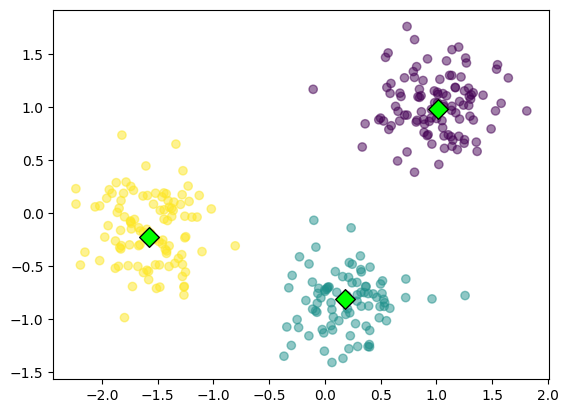

In [37]:
fig, ax = plt.subplots()

xs = new_points[:, 0]
ys = new_points[:, 1]

ax.scatter(xs, ys, c=labels, alpha=0.5)
ax.scatter(centroids_x, centroids_y, color='lime',
           s=100, marker='D', edgecolor='black')
plt.show()

## Evaluating a clustering

- Can check how well the clusters correspond with the iris species
    - But what if there are no species to check against?
- Measure quality of a clustering
- Informs choice of how many clusters to look for

### Iris: clusters vs species

- k-means found 3 clusters amongst the iris samples
- Do the clusters correspond to the species?

In [38]:
X = iris.drop('variety', axis=1)
y = iris['variety']

In [39]:
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

In [40]:
labels = model.predict(X)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [41]:
species = y
species

,variety
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa
...,...
145,Virginica
146,Virginica
147,Virginica
148,Virginica


In [42]:
df = pd.DataFrame({'labels': labels,
                   'species': species})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   labels   150 non-null    int32 
 1   species  150 non-null    object
dtypes: int32(1), object(1)
memory usage: 1.9+ KB


In [43]:
table = pd.crosstab(index=df['labels'], columns=df['species'])
table

species,Setosa,Versicolor,Virginica
labels,,,
0,0,3,36
1,50,0,0
2,0,47,14


In [44]:
# alternately
#. more flexible because you can choose the aggfunc
table = df.pivot_table(index='labels',
                       columns='species',
                       aggfunc='size',
                       fill_value=0)
table

species,Setosa,Versicolor,Virginica
labels,,,
0,0,3,36
1,50,0,0
2,0,47,14


### Measuring clustering quality

- Using only samples and their cluster labels
- A good clustering has tight clusters
- Samples in each cluster bunched together


### Inertia measures clustering quality

- Measure how spread out the clusters are (lower is better)
- Distance from each sample to the centroid of the cluster
- After fit, the `inertia_` attribute of the model becomes available
- K-means attempts to miimize the inertia when choosing clusters

In [45]:
model.inertia_

78.85566582597727

In [46]:
!pip install kneed

In [47]:
from kneed import KneeLocator

inertia = []
cluster_sizes = np.arange(1, 11)

for n_clusters in cluster_sizes:
    model = KMeans(n_clusters=n_clusters)
    model.fit(X)
    inertia.append(model.inertia_)

knee_locator = KneeLocator(cluster_sizes, inertia, curve='convex', direction='decreasing')
elbow_k = knee_locator.elbow
elbow_k

3

- **NOTE**: KneeLocator words well on smooth data, but might fail on noisy or highly linear curves

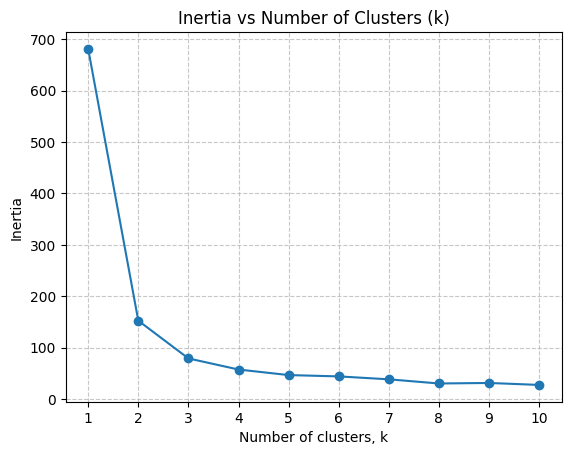

In [48]:
plt.plot(cluster_sizes, inertia, marker='o')

plt.title('Inertia vs Number of Clusters (k)')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(cluster_sizes)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

- The inertia is low when k=3, which is great
- But the inertia continues to decrease, more clusters meansm lower inertia
- What is the best number to choose?
    - Ultimately, this is a trade-off
    - A good clustering has tight clusters (low inertia)
    - But it also doesn't have too many clusters
    - Choose an **elbow** in the inertia plotdefine
        - The point where inertia begins to decrease more slowly



### How many clusters of grain?

In [49]:
X = seeds.iloc[:, 0:-1].to_numpy()
y = seeds.iloc[:, -1].to_numpy()
X.shape, y.shape

((210, 7), (210,))

In [50]:
ks = range(1, 6)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)

inertias

[2719.8524101779526,
 1011.860413284119,
 587.3186115940429,
 523.1576225372337,
 414.60489543146286]

In [51]:
knee_locator = KneeLocator(ks, inertias, curve='convex', direction='decreasing')
elbow_k = knee_locator.elbow
elbow_k

2

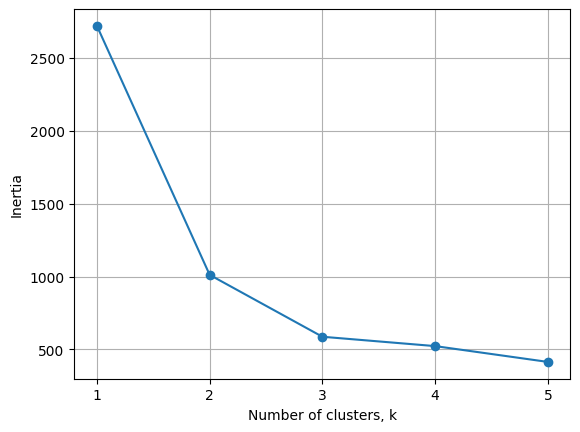

In [52]:
plt.plot(ks, inertias, '-o')

plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.grid()
plt.show()

- The elbow is calculated as 3, but visually, it looks like 3 clusters woiuld be a better choice.

### Evaluating the grain clustering

In [53]:
model = KMeans(n_clusters=3)
labels = model.fit_predict(X)

In [54]:
df = pd.DataFrame({'labels': labels, 'varieties': y})

mapping = {1: 'Kama wheat', 2: 'Rosa wheat', 3: 'Canadian wheat'}
df['varieties'] = df['varieties'].map(mapping)

df.head()

,labels,varieties
0,1,Kama wheat
1,1,Kama wheat
2,1,Kama wheat
3,1,Kama wheat
4,1,Kama wheat


In [55]:
ct = pd.crosstab(index=df['labels'], columns=df['varieties'])
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,0,1,60
1,2,60,10
2,68,9,0


## Transforming features for better clusterings

In [56]:
print(wine.shape)
wine.head()

(178, 15)


,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [57]:
# class_label and class_name, both could be the target
pd.crosstab(wine['class_label'], wine['class_name'])

class_name,Barbera,Barolo,Grignolino
class_label,,,
1,0,59,0
2,0,0,71
3,48,0,0


### Clustering the wines

In [58]:
X = wine.drop(['class_label', 'class_name'], axis=1)
y = wine['class_name']

In [59]:
model = KMeans(n_clusters=3)
labels = model.fit_predict(X)

In [60]:
df = pd.DataFrame({'labels': labels, 'varieties': y})
df.head()

,labels,varieties
0,1,Barolo
1,1,Barolo
2,1,Barolo
3,1,Barolo
4,2,Barolo


### Clusters vs. varieties

In [61]:
ct = pd.crosstab(index=df['labels'], columns=df['varieties'])
ct

varieties,Barbera,Barolo,Grignolino
labels,,,
0,19,0,50
1,0,46,1
2,29,13,20


- The clusters don't correspond well with the wine varieties

### Feature variances

- The wine features have very different variances

In [62]:
variances = X.var()
variances = pd.DataFrame({'feature': variances.index, 'variance': variances.values})
variances

,feature,variance
0,alcohol,0.659062
1,malic_acid,1.248015
2,ash,0.075265
3,alcalinity_of_ash,11.152686
4,magnesium,203.989335
5,total_phenols,0.391690
6,flavanoids,0.997719
7,nonflavanoid_phenols,0.015489
8,proanthocyanins,0.327595
9,color_intensity,5.374449


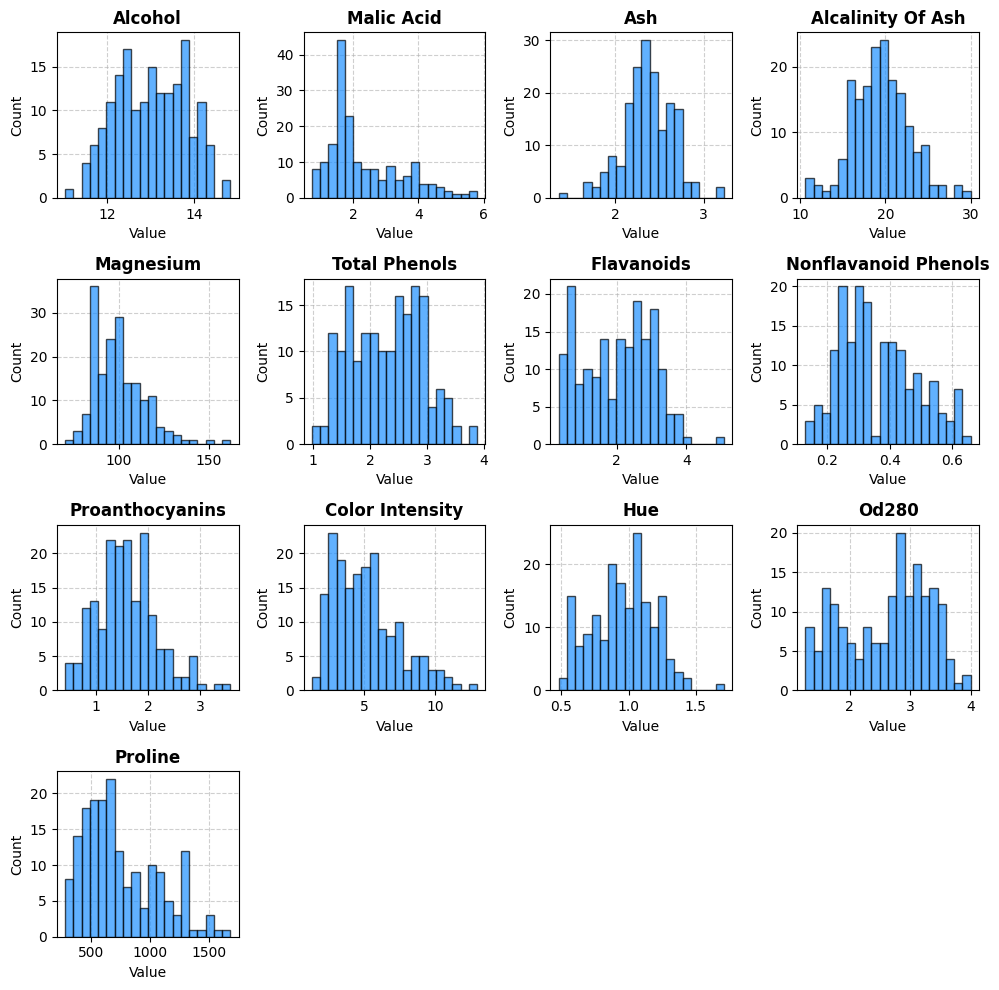

In [63]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
axes = axes.flatten() # for easier iteration

for i, col in enumerate(X.columns):
    ax = axes[i]
    X[col].hist(ax=ax, bins=20, edgecolor='black',
                alpha=0.7, color='dodgerblue')
    ax.set_title(col.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    ax.set_xlabel('Value', fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.set_axisbelow(True)

# hide unused subplots
for j in range(len(X.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### `StandardScaler`

- With `KMeans`: feature variance = feature influence
- `StandardScaler`: mean 0 and variance 1

#### Note

- `StandardScaler` has `fit()` and `transform()` methods, so it is a **Transformer**
- `KMeans` has `fit()` and `predict()` methods, so it is called an **Estimator**

In [64]:
scaler = StandardScaler() # with_mean=True, with_std=True by default
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

In [65]:
variances = X_scaled.var()
variances = pd.DataFrame({'feature': variances.index, 'variance': variances.values})
variances

,feature,variance
0,alcohol,1.00565
1,malic_acid,1.00565
2,ash,1.00565
3,alcalinity_of_ash,1.00565
4,magnesium,1.00565
5,total_phenols,1.00565
6,flavanoids,1.00565
7,nonflavanoid_phenols,1.00565
8,proanthocyanins,1.00565
9,color_intensity,1.00565


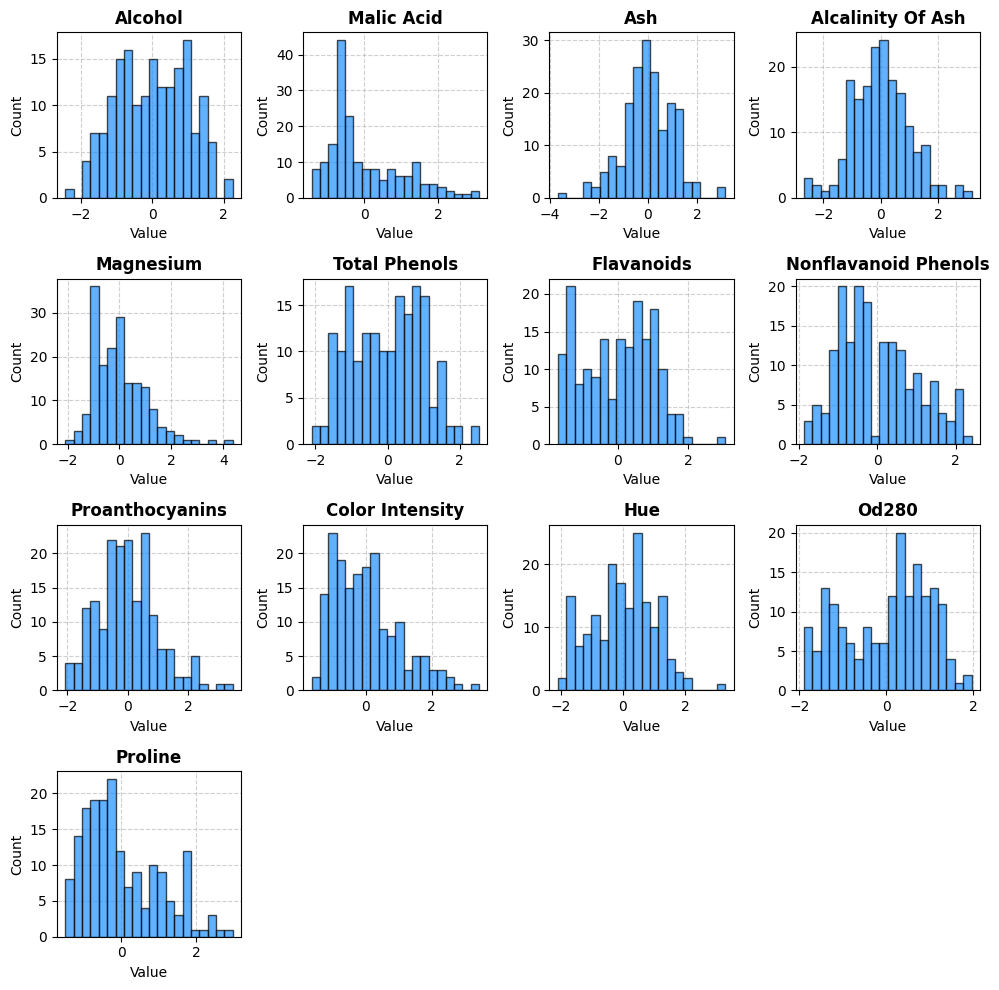

In [66]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
axes = axes.flatten() # for easier iteration

for i, col in enumerate(X_scaled.columns):
    ax = axes[i]
    X_scaled[col].hist(ax=ax, bins=20, edgecolor='black',
                alpha=0.7, color='dodgerblue')
    ax.set_title(col.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    ax.set_xlabel('Value', fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.set_axisbelow(True)

# hide unused subplots
for j in range(len(X_scaled.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Clustering the wines after using the `StandardScaler` using a `Pipeline`

In [67]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)

pipeline = make_pipeline(scaler, kmeans)
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [68]:
labels = pipeline.fit_predict(X)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [69]:
df_scaled = pd.DataFrame({'labels': labels, 'varieties': y})
df_scaled.head()

,labels,varieties
0,0,Barolo
1,0,Barolo
2,0,Barolo
3,0,Barolo
4,0,Barolo


In [70]:
ct_standard = pd.crosstab(index=df_scaled['labels'], columns=df_scaled['varieties'])
ct_standard

varieties,Barbera,Barolo,Grignolino
labels,,,
0,0,59,3
1,48,0,3
2,0,0,65


- Standardization made a huge difference to the quality of the clustering. Recall what the clustering looked like without standardization:

In [71]:
ct

varieties,Barbera,Barolo,Grignolino
labels,,,
0,19,0,50
1,0,46,1
2,29,13,20


### `sklearn` preprocessing steps

- `StandardScaler` is a **preprocessing** step
- `MaxAbsScaler` and `Normalizer` are other examples

### Scaling fish data for clustering



In [72]:
fish.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [73]:
X = fish.iloc[:, 1:].values
y = fish.iloc[:, 0]
X.shape, y.shape

((85, 6), (85,))

In [74]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=4)
pipeline = make_pipeline(scaler, kmeans)

pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4))])

In [75]:
labels = pipeline.fit_predict(X)
df = pd.DataFrame({'labels': labels, 'species': y})
ct = pd.crosstab(index=df['labels'], columns=df['species'])
ct

species,Bream,Pike,Roach,Smelt
labels,,,,
0,34,0,3,0
1,0,12,0,0
2,0,0,17,14
3,0,5,0,0


- The clustering quality looks good

### Clustering stocks using `KMeans`

In [76]:
movements = stock_movement.iloc[:, 1:].to_numpy()
companies = stock_movement['Company'].to_numpy()
movements.shape, companies.shape

((60, 963), (60,))

#### `Normalizer`

The Normalizer in scikit-learn is a **row-wise** normalization technique that scales each sample (row) to have unit norm. It is different from StandardScaler and MinMaxScaler, which scale **column-wise**.

The Normalizer transfor each row **independently** so that is **norm** is 1.

For a given row $x$, the tranformation is:

$$
x{\prime} = \frac{x}{\|x\|} = \frac{x}{\sqrt{x_1^2 + x_2^2 + \dots + x_n^2}}
$$

where $\|x\|$ is the norm of the row:

- L2 norm (default): $\sqrt{x_1^2 + x_2^2 + \dots + x_n^2}$
- L1 norm: $|x_1| + |x_2| + \dots + |x_n|$
- Can also be Max Normalization

#### When to use `Normalizer`

- If you care about feature magnitues across samples, use `StandardScaler` or `MinMaxScaler`
- If you care about vector direction (not magnitude), use `Normalizer`
    - best when vector magnitudes should not affect the model
    - most useful whenm the relationship betwen features within each row matter more than absolute values



In [77]:
normalizer = Normalizer()
normalizer

Normalizer()

In [78]:
normalizer_normalized = normalizer.fit_transform(movements)
normalizer_normalized

array([[ 0.00302051, -0.00114574, -0.01775851, ..., -0.02791349,
         0.00437463, -0.10202026],
       [-0.02599391, -0.02639998, -0.00852927, ..., -0.00162466,
        -0.01624623,  0.02680614],
       [-0.02208986,  0.01184398, -0.02208986, ...,  0.04502568,
        -0.01654394,  0.03515588],
       ...,
       [ 0.01981027,  0.01059598,  0.02626006, ..., -0.01197837,
         0.01842816,  0.02211388],
       [ 0.0200991 ,  0.00223323, -0.01786587, ..., -0.0066997 ,
         0.00446647, -0.0066997 ],
       [ 0.01796837,  0.00112314,  0.        , ..., -0.00673829,
         0.02919855,  0.01123007]])

In [79]:
# doing it manually
manually_normalized = np.zeros_like(movements, dtype=movements.dtype)

for i in range(movements.shape[0]):
    row = movements[i]
    norm = np.sqrt(np.sum(row ** 2)) # L2 norm
    if norm != 0:
        manually_normalized[i] = row / norm

manually_normalized

array([[ 0.00302051, -0.00114574, -0.01775851, ..., -0.02791349,
         0.00437463, -0.10202026],
       [-0.02599391, -0.02639998, -0.00852927, ..., -0.00162466,
        -0.01624623,  0.02680614],
       [-0.02208986,  0.01184398, -0.02208986, ...,  0.04502568,
        -0.01654394,  0.03515588],
       ...,
       [ 0.01981027,  0.01059598,  0.02626006, ..., -0.01197837,
         0.01842816,  0.02211388],
       [ 0.0200991 ,  0.00223323, -0.01786587, ..., -0.0066997 ,
         0.00446647, -0.0066997 ],
       [ 0.01796837,  0.00112314,  0.        , ..., -0.00673829,
         0.02919855,  0.01123007]])

In [80]:
np.sum(normalizer_normalized - manually_normalized) # very close to 0

-3.0274821007352654e-14

In [81]:
# doing it manually
manually_normalized2 = np.zeros_like(movements, dtype=movements.dtype)

for i in range(movements.shape[0]):
    row = movements[i]
    norm = np.linalg.norm(row)
    if norm != 0:
        manually_normalized2[i] = row / norm

manually_normalized2

array([[ 0.00302051, -0.00114574, -0.01775851, ..., -0.02791349,
         0.00437463, -0.10202026],
       [-0.02599391, -0.02639998, -0.00852927, ..., -0.00162466,
        -0.01624623,  0.02680614],
       [-0.02208986,  0.01184398, -0.02208986, ...,  0.04502568,
        -0.01654394,  0.03515588],
       ...,
       [ 0.01981027,  0.01059598,  0.02626006, ..., -0.01197837,
         0.01842816,  0.02211388],
       [ 0.0200991 ,  0.00223323, -0.01786587, ..., -0.0066997 ,
         0.00446647, -0.0066997 ],
       [ 0.01796837,  0.00112314,  0.        , ..., -0.00673829,
         0.02919855,  0.01123007]])

In [82]:
np.sum(normalizer_normalized - manually_normalized2) # very close to 0

-3.080977313552058e-14

#### Using a pipeline to cluster the stock movement data

In [83]:
normalizer = Normalizer()
kmeans = KMeans(n_clusters=10)
pipeline = make_pipeline(normalizer, kmeans)

pipeline

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

In [84]:
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

### Which stocks move together?

In [85]:
labels = pipeline.predict(movements)
labels

array([8, 3, 8, 3, 6, 3, 9, 4, 7, 5, 7, 1, 7, 4, 1, 4, 3, 8, 3, 9, 4, 4,
       4, 8, 1, 5, 3, 5, 9, 6, 0, 9, 4, 1, 4, 2, 6, 9, 5, 5, 5, 9, 9, 8,
       7, 4, 8, 8, 4, 8, 1, 1, 9, 7, 5, 3, 5, 7, 4, 4], dtype=int32)

In [86]:
df = pd.DataFrame({'labels': labels, 'companies': companies})
df.head()

,labels,companies
0,8,Apple
1,3,AIG
2,8,Amazon
3,3,American express
4,6,Boeing


In [87]:
print(df.sort_values(by='labels'))

    labels                           companies
30       0                          MasterCard
33       1                           Microsoft
51       1                   Texas instruments
50       1  Taiwan Semiconductor Manufacturing
11       1                               Cisco
24       1                               Intel
14       1                                Dell
35       2                            Navistar
1        3                                 AIG
3        3                    American express
55       3                         Wells Fargo
5        3                     Bank of America
18       3                       Goldman Sachs
26       3                      JPMorgan Chase
16       3                   General Electrics
21       4                               Honda
58       4                               Xerox
32       4                                  3M
22       4                                  HP
20       4                          Home Depot
59       4   